In [20]:
%pylab inline
import datajoint as dj
import exam_schema as es # schema varable beomes available

Populating the interactive namespace from numpy and matplotlib


## plot entity-relationship diagram

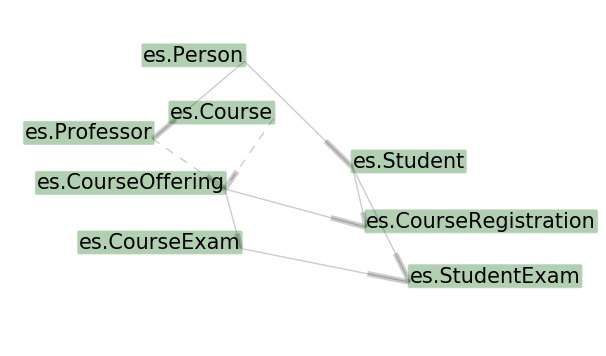

In [21]:
dj.ERD(es.schema).draw()

## populate data

In [22]:
# Create fake course registration data
es.create_fake_data()

In [23]:
(exam_schema.Course() & 'course_number=2')

course_number,course_desc


In [62]:
# Query courses
print(es.Course())
# Query course offerings for course 1
print(es.CourseOffering() &  (es.Course() & 'course_number=1'))
# Query Majors of students table, who are registered for course_offering 1
print(es.Student().proj('major', student='person_id',) * (es.CourseRegistration() & 'course_offering_id=1'))



*course_number course_desc   
+------------+ +------------+
1              An introductio
 (1 tuples)

*course_offeri course_number  professor_id   term       year    
+------------+ +------------+ +------------+ +--------+ +------+
1              1              1              fall       2016    
2              1              2              winter     2017    
 (2 tuples)

*student    *course_offeri major    
+---------+ +------------+ +-------+
3           1              math     
4           1              csci     
 (2 tuples)



In [64]:
# Create some exams for each course_ffering
es.CourseExam().insert((
    [1,1,100],
    [1,2,150],
    [1,3,85]), skip_duplicates=True)

es.CourseExam().insert((
    [2,1,120],
    [2,2,130]), skip_duplicates=True)

In [67]:
# Record student scores for each course's set of tests.
es.StudentExam().insert((
    [1,1,3,100],
    [1,2,3,132],
    [1,3,3,83],
    [1,1,4,87],
    [1,2,4,142],
    [1,3,4,80]), skip_duplicates=True)

es.StudentExam().insert((
    [2,1,5,117],
    [2,2,5,110],
    [2,1,6,119],
    [2,2,6,124]), skip_duplicates=True)


